# 따릉이 데이터 시각화 


In [6]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 공공자전거 대여소 정보 데이터 확인

In [48]:
geo_info = pd.read_csv('../../data/공공자전거 대여소 정보.csv', encoding='cp949')

In [49]:
#위도, 경도가 0,0으로 잘못표기된 데이터 존재
geo_info.head(10)

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,망원역 1번출구 앞,마포구,서울특별시 마포구 월드컵로 72,37.5556488,126.9106293,2015.9.6,20,NaN,LCD
5,103.0,망원역 2번출구 앞,마포구,서울특별시 마포구 월드컵로 79,37.55495071,126.9108353,2015.9.6,14,NaN,LCD
6,104.0,합정역 1번출구 앞,마포구,서울특별시 마포구 양화로 59,37.55062866,126.9149857,2015.9.6,13,NaN,LCD
7,105.0,합정역 5번출구 앞,마포구,서울특별시 마포구 양화로 48,37.55000687,126.9148254,2015.9.6,5,NaN,LCD
8,106.0,합정역 7번출구 앞,마포구,서울특별시 마포구 독막로 4,37.54864502,126.9128265,2015.9.6,10,NaN,LCD
9,107.0,신한은행 서교동금융센터점 앞,마포구,서울특별시 마포구 월드컵북로 35,37.55751038,126.9185028,2015.9.6,5,NaN,LCD


#### Column 이름 바꾸고 앞에 의미없는 데이터 삭제


In [51]:
geo_info.columns

geo_info.rename(columns = {'Unnamed: 3':'상세주소	','Unnamed: 4':'위도','Unnamed: 5':'경도','Unnamed: 8':'거치대 수'},inplace=True)

geo_info = geo_info.drop(index=[0,1,2,3],  axis=0)

In [52]:
#type 확인하고 지도에 표기하기 위해 위도, 경도를 float 타입으로 변환
geo_info.dtypes
geo_info = geo_info.astype({'위도':'float'})
geo_info = geo_info.astype({'경도':'float'})

In [53]:
#folium 이용해서 지도상에 대여소 표기 -> 밀집도 확인 가능
map = folium.Map(location=[geo_info['위도'].mean(), geo_info['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
for i, row in geo_info.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        fill=True,
    ).add_to(map)
map

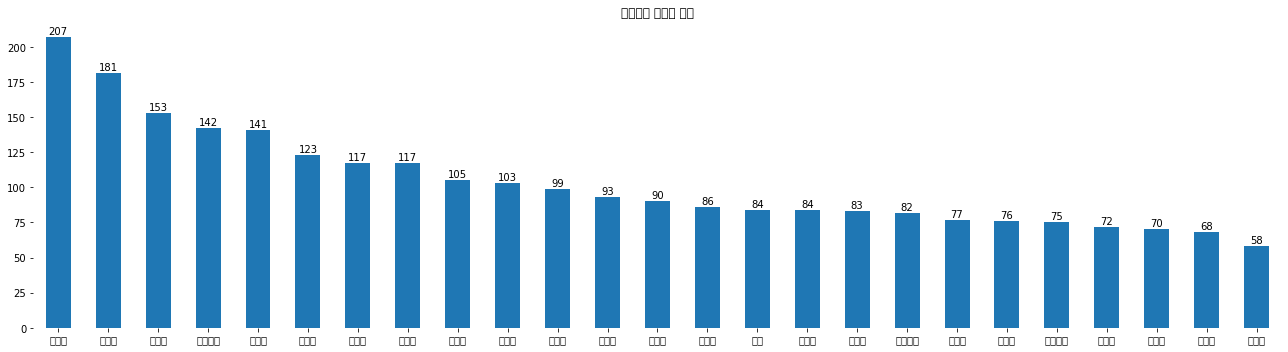

In [54]:
#지역구에 따른 대여소 위치 확인 
bikes = geo_info.groupby('소재지(위치)').size()
bikes.sort_values(ascending=False, inplace=True)

ax = bikes.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 대여소 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

### 공공자전거 대여 이력 정보 데이터 보기

In [9]:
#따릉이 대여 이력 정보 가져오기
rental_info = pd.read_csv('../../data/공공자전거 대여이력 정보_2112.csv', encoding='cp949' )

In [13]:
rental_info.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53035,2021-12-01 09:45:56,3,중랑센터,0,2021-12-01 09:58:57,646,장한평역 1번출구 (국민은행앞),0,13,0.00
1,SPB-40999,2021-12-05 16:02:31,3,중랑센터,0,2021-12-05 16:07:58,529,장한평역 8번 출구 앞,0,5,0.00
2,SPB-55934,2021-12-10 22:01:39,3,중랑센터,0,2021-12-10 22:40:27,1332,석계역 5번출구 건너편,0,38,8710.00
3,SPB-50913,2021-12-11 07:01:32,3,중랑센터,0,2021-12-11 07:11:11,540,군자역 7번출구 베스트샵 앞,0,9,0.00
4,SPB-31324,2021-12-15 16:02:04,3,중랑센터,0,2021-12-15 16:13:21,540,군자역 7번출구 베스트샵 앞,0,11,2161.63
5,SPB-48124,2021-12-18 11:31:22,3,중랑센터,0,2021-12-18 11:36:36,529,장한평역 8번 출구 앞,0,5,1050.00
6,SPB-47514,2021-12-29 14:25:16,3,중랑센터,0,2021-12-29 14:36:57,3586,군자역 비채온 오피스텔,0,11,0.00
7,SPB-50583,2021-12-29 17:52:15,3,중랑센터,0,2021-12-29 18:05:07,529,장한평역 8번 출구 앞,0,12,1080.00
8,SPB-55734,2021-12-31 11:14:10,3,중랑센터,0,2021-12-31 11:25:01,529,장한평역 8번 출구 앞,0,10,1090.00
9,SPB-58607,2021-12-07 16:00:59,5,상암센터 정비실,0,2021-12-07 16:26:01,930,구 서부경찰서 건너편,0,25,5170.00


In [14]:
rental_info.shape


(1704297, 11)